# Expression Quality Control (Part 1)
This is a template notebook for performing preliminary quality control on your organism's expression data.

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path

In [2]:
sns.set_style('ticks')

### Inputs

Enter path of log-TPM, MultiQC, and metadata files here

In [32]:
logTPM_file = '../../deep-5g-sandbox/data/log_norm_uMax_indiv_lowExAdj_20221031.csv' # Enter log-TPM filename here
#multiqc_file = path.join('..','data','raw_data','multiqc_stats.tsv') # Enter MultiQC stats filename here
#metadata_file = path.join('..','data','5g_processed_data','5G_exp_metadata_coded.tsv') # Enter metadata filename here
metadata_file = '/work/ewilson6/workspace/5g-cmetab-tpm-viz/data/5G_exp_metadata.tsv'
#metadata_file = '/work/5GB1c_rnaseq/data/5G_exp_metadata_filter.txt'

### Load expression data

In [17]:
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0)#.fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 4180
Number of samples: 102


,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-3.876180,-2.839722,-0.601044,0.047941,-1.049614,-0.502454,-0.649416,-0.641155,-0.645506,-0.595231,...,-0.154942,-0.432784,-0.493871,-0.223650,-0.558950,-0.280948,0.399464,0.373487,-0.284211,0.121865
EQU24_RS00010,-4.942344,-3.672667,-0.733380,-0.080914,-0.721494,-0.506424,-0.900744,-0.834632,-0.952361,-0.934059,...,-0.135052,-0.109768,-0.507752,-0.148888,-0.465297,-0.124955,-0.597569,-0.565058,-0.721821,-0.504324
EQU24_RS00015,-4.310416,-3.467610,-0.516520,-0.140261,-0.683805,-0.216384,-0.810810,-0.900097,-0.813251,-0.780671,...,-0.398019,-0.424310,-0.697607,-0.365188,-0.587363,-0.136621,-0.092184,-0.258713,-0.736253,-0.397627
EQU24_RS00020,-4.201897,-3.778003,-0.649819,0.075143,-0.458800,-0.283088,-0.723023,-0.737316,-0.699194,-0.764430,...,-0.033110,0.067333,-0.151694,0.100365,-0.081217,-0.004456,-0.288024,-0.198564,-0.117120,0.071733
EQU24_RS00035,-2.976936,-2.882063,-1.256002,-0.200434,-0.556848,-0.335072,0.071070,0.096697,0.256685,0.297170,...,0.769285,0.607397,0.550830,0.745583,0.602460,0.897642,0.317582,0.251670,0.437081,0.769975


### Load QC data
There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.

In [18]:
# DF_qc_stats = pd.read_csv(multiqc_file,index_col=0, sep='\t')
# print('Number of samples with QC data:',DF_qc_stats.shape[0])

In [19]:
# DF_qc_stats.fillna(0,inplace=True)
# DF_qc_stats.head()

### Load metadata

In [36]:
DF_metadata = pd.read_csv(metadata_file,sep='\t')
DF_metadata['sample_id'] = DF_metadata['#sample'].apply(lambda x: f'{x}_tpm')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata

Number of samples with metadata: 106


,exp_theme,exp_condition,#sample,shortd,longd,mutation_locus,bior,techr,path_to_FASTQ,path_to_FASTQ_paired_end,...,OD,Dilution rate (per day),Abnormal medium? (NMS2 unless indicated otherwise),O2-stressed,N-stressed,Fe-stressed,Cu-stressed,EPS,marker_for,sample_id
0,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_Ack_QC,ferm_Ack_QC,Melissa needs to provide details (acetate kinase),MBURv2_60338,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_Ack_QC...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_ferm_Ack_QC_tpm
1,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_WT_QC,ferm_WT_QC,Melissa needs to provide details,NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_WT_QC....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_ferm_WT_QC_tpm
2,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,1.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM03_TR1_QC_tpm
3,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,1.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM03_TR2_QC_tpm
4,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,2.4,4.3,NaN,low,NaN,NaN,NaN,NaN,NaN,5GB1_FM11_TR1_QC_tpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Lanthanum,NoLanthanum,5GB1C-JG15-N-BR2,deltaTBDT_NoLa_rep2,Vial sample in mid- to late-exponential phase,MBURv2_130812,2.0,1,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C-JG15-N-BR2_tpm
102,lowCH4_conc,CH4_500ppm,5GB1C_CH4_500ppm-Rep1,5GB1C_CH4_500ppm-Rep1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_500ppm-Rep1_tpm
103,lowCH4_conc,CH4_500ppm,5GB1C_CH4_500ppm-Rep2,5GB1C_CH4_500ppm-Rep2,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_500ppm-Rep2_tpm
104,lowCH4_conc,CH4_1000ppm,5GB1C_CH4_1000ppm-Rep2,5GB1C_CH4_1000ppm-Rep2,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_1000ppm-Rep2_tpm


In [34]:
DF_metadata['exp_condition'].unique()

array(['lowO2_slow_growth', 'uMax', 'lowO2_fast_growth', 'lowCH4', 'MeOH',
       'NoCu', 'medCu', 'highCu', 'lowCu', 'slow_growth',
       'highO2_slow_growth', 'NO3_lowO2_slow_growth', 'LanzaTech',
       'WithLanthanum', 'NoLanthanum', 'unknown', 'aa3_KO', 'WT_control',
       'crotonic_acid', 'CH4_500ppm', 'CH4_1000ppm'], dtype=object)

### Remove extra sample rows

Ensure that metadata and qc_stats data contain all log_tpm sample information.

In [37]:
assert(set(DF_log_tpm.columns) - set(DF_metadata.sample_id) == set())
#assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [38]:
DF_metadata = DF_metadata[DF_metadata['sample_id'].isin(DF_log_tpm.columns)]
#DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
#DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

In [39]:
DF_metadata

,exp_theme,exp_condition,#sample,shortd,longd,mutation_locus,bior,techr,path_to_FASTQ,path_to_FASTQ_paired_end,...,OD,Dilution rate (per day),Abnormal medium? (NMS2 unless indicated otherwise),O2-stressed,N-stressed,Fe-stressed,Cu-stressed,EPS,marker_for,sample_id
0,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_Ack_QC,ferm_Ack_QC,Melissa needs to provide details (acetate kinase),MBURv2_60338,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_Ack_QC...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_ferm_Ack_QC_tpm
1,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_WT_QC,ferm_WT_QC,Melissa needs to provide details,NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_WT_QC....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_ferm_WT_QC_tpm
2,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,1.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM03_TR1_QC_tpm
3,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,1.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM03_TR2_QC_tpm
4,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,2.4,4.3,NaN,low,NaN,NaN,NaN,NaN,NaN,5GB1_FM11_TR1_QC_tpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Lanthanum,NoLanthanum,5GB1C-JG15-N-BR2,deltaTBDT_NoLa_rep2,Vial sample in mid- to late-exponential phase,MBURv2_130812,2.0,1,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C-JG15-N-BR2_tpm
102,lowCH4_conc,CH4_500ppm,5GB1C_CH4_500ppm-Rep1,5GB1C_CH4_500ppm-Rep1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_500ppm-Rep1_tpm
103,lowCH4_conc,CH4_500ppm,5GB1C_CH4_500ppm-Rep2,5GB1C_CH4_500ppm-Rep2,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_500ppm-Rep2_tpm
104,lowCH4_conc,CH4_1000ppm,5GB1C_CH4_1000ppm-Rep2,5GB1C_CH4_1000ppm-Rep2,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_1000ppm-Rep2_tpm


In [40]:
DF_log_tpm.columns

Index(['5GB1_ferm_Ack_QC_tpm', '5GB1_ferm_WT_QC_tpm', '5GB1_FM03_TR1_QC_tpm',
       '5GB1_FM03_TR2_QC_tpm', '5GB1_FM11_TR1_QC_tpm', '5GB1_FM11_TR2_QC_tpm',
       '5GB1_FM12_TR1_tpm', '5GB1_FM12_TR1_QC_tpm', '5GB1_FM12_TR2_tpm',
       '5GB1_FM12_TR2_QC_tpm',
       ...
       '5GB1C-5G-N-BR1_tpm', '5GB1C-5G-N-BR2_tpm', '5GB1C-JG15-La-BR1_tpm',
       '5GB1C-JG15-La-BR2_tpm', '5GB1C-JG15-N-BR1_tpm', '5GB1C-JG15-N-BR2_tpm',
       '5GB1C_CH4_500ppm-Rep1_tpm', '5GB1C_CH4_500ppm-Rep2_tpm',
       '5GB1C_CH4_1000ppm-Rep1_tpm', '5GB1C_CH4_1000ppm-Rep2_tpm'],
      dtype='object', length=102)

## Check QC statistics

### FastQC quality control

In [12]:
# fastqc_cols = ['per_base_sequence_quality',
#        'per_tile_sequence_quality', 'per_sequence_quality_scores',
#        'per_base_sequence_content', 'per_sequence_gc_content',
#        'per_base_n_content', 'sequence_length_distribution',
#        'sequence_duplication_levels', 'overrepresented_sequences',
#        'adapter_content']

In [13]:
# DF_fastqc = DF_qc_stats[fastqc_cols]
# ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
#             cmap='RdYlBu',vmax=1.3,vmin=-1.3)
# cbar = ax.collections[0].colorbar
# cbar.set_ticks([-1,0,1])
# cbar.set_ticklabels(['fail','warn','pass'])

The following four categories are the most important:
* per_base_sequence_quality
* per_sequence_quality_scores
* per_base_n_content
* adapter_content
    
If a sample does not pass any of these four categories, discard the sample.

In [14]:
# fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [15]:
# DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
# DF_failed_fastqc[fastqc_fail_cols]

Mark samples that passed.

In [16]:
# DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

### Number of aligned reads

The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.

In [17]:
# min_mrna_reads = 500000 # Minimum number of reads mapped to mRNA (500,000)

In [18]:
# fig,ax = plt.subplots()
# ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
# ymin,ymax = ax.get_ylim()
# ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
# ax.set_ylim((ymin,ymax))
# ax.set_xlabel('# Reads (M)',fontsize=14)
# ax.set_ylabel('# Samples',fontsize=14)
# ax.set_title('Number of reads mapped to CDS',fontsize=16)

Identify samples with poor read depth:

In [19]:
# DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
# DF_failed_mrna

Mark samples that passed.

In [20]:
# DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

### Examine Global Correlations

Only examine data that passed the first two steps.

In [41]:
#metadata_passed_step2 = DF_metadata[DF_metadata[['passed_fastqc','passed_reads_mapped_to_CDS']].all(axis=1)]
DF_log_tpm_passed_step2 = DF_log_tpm#[metadata_passed_step2.index]

A clustermap is a great way to visualize the global correlations between one sample and all others. The ``global_clustering`` function uses hierarchical clustering to identify specific clusters in the clustermap. The optional arguments are:

* ``threshold``: Threshold used to extract clusters from the hierarchy. To increase the number of clusters, decrease the value of ``threshold``. To decrease the number of clusters, increase the value of ``threshold`` (default: 0.3)
* ``figsize``: A tuple describing the length and width of the final clustermap. A larger figsize can make x and y-axis labels clearer.
* ``xticklabels``: Show NCBI SRA accession numbers on the x-axis
* ``yticklabels``: Show NCBI SRA accession numbers on the y-axis

In [42]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches

def global_clustering(data, threshold=0.3, xticklabels=False, yticklabels=False, figsize=(9,9)):
    
    # Retrieve clusters using fcluster 
    corr = data.corr()
    corr.fillna(0,inplace=True)
    dist = sch.distance.pdist(corr)
    link = sch.linkage(dist, method='complete')
    clst = pd.DataFrame(index=data.columns)
    clst['cluster'] = sch.fcluster(link, threshold * dist.max(), 'distance')

    # Get colors for each cluster
    cm = plt.cm.get_cmap('tab20')
    cluster_colors = dict(zip(clst.cluster.unique(), cm.colors))
    clst['color'] = clst.cluster.map(cluster_colors)

    print('Number of cluster: ', len(cluster_colors))
    
    legend_items = [patches.Patch(color=c, label=l) for l,c in cluster_colors.items()]
    
    sns.set(rc={'figure.facecolor':'white'})
    
    clst_map = sns.clustermap(data.corr(), 
                              figsize=figsize, 
                              row_linkage=link, 
                              col_linkage=link, 
                              col_colors=clst.color,
                              yticklabels=yticklabels, 
                              xticklabels=xticklabels,
                              vmin=0, 
                              vmax=1)
    
    legend = clst_map.ax_heatmap.legend(loc='upper left', 
                                        bbox_to_anchor=(1.01,0.85), 
                                        handles=legend_items,
                                        frameon=True)
    
    legend.set_title(title='Clusters',prop={'size':10})
    
    return clst['cluster']

Number of cluster:  18


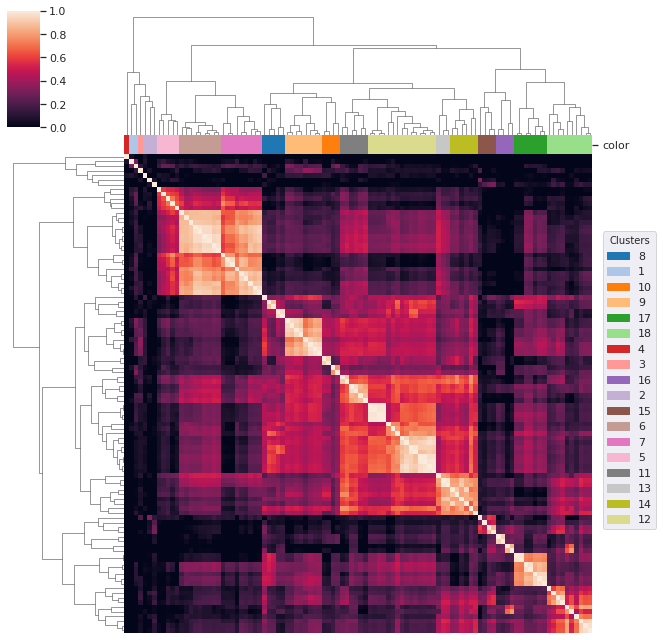

In [43]:
clusters = global_clustering(DF_log_tpm_passed_step2)

In [44]:
samp2clust = dict(clusters)

In [45]:
DF_metadata['cluster_id'] = DF_metadata['sample_id'].apply(lambda x: samp2clust[x])

/home/ewilson6/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='cluster_id'>

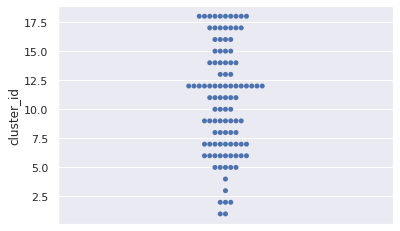

In [46]:
# viz cluster results vs my exp conditions?
sns.swarmplot(data = DF_metadata,y='cluster_id',hue='exp_condition')

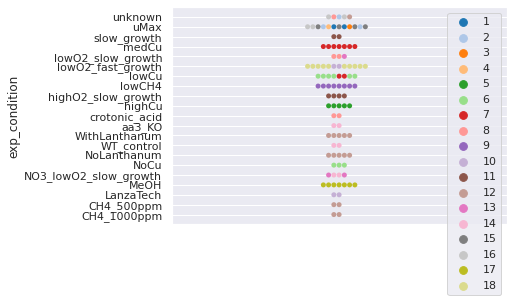

In [47]:
#sns.swarmplot(y=tips["total_bill"], hue=tips["sex"], x=[""]*len(tips))
sns.swarmplot(hue=DF_metadata['cluster_id'],y=DF_metadata['exp_condition'],x=[""]*len(DF_metadata),palette='tab20')
plt.legend(bbox_to_anchor=(1, 1))

In [48]:
DF_metadata

,exp_theme,exp_condition,#sample,shortd,longd,mutation_locus,bior,techr,path_to_FASTQ,path_to_FASTQ_paired_end,...,Dilution rate (per day),Abnormal medium? (NMS2 unless indicated otherwise),O2-stressed,N-stressed,Fe-stressed,Cu-stressed,EPS,marker_for,sample_id,cluster_id
0,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_Ack_QC,ferm_Ack_QC,Melissa needs to provide details (acetate kinase),MBURv2_60338,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_Ack_QC...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_ferm_Ack_QC_tpm,8
1,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_WT_QC,ferm_WT_QC,Melissa needs to provide details,NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_WT_QC....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_ferm_WT_QC_tpm,8
2,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM03_TR1_QC_tpm,1
3,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM03_TR2_QC_tpm,1
4,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,4.3,NaN,low,NaN,NaN,NaN,NaN,NaN,5GB1_FM11_TR1_QC_tpm,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Lanthanum,NoLanthanum,5GB1C-JG15-N-BR2,deltaTBDT_NoLa_rep2,Vial sample in mid- to late-exponential phase,MBURv2_130812,2.0,1,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C-JG15-N-BR2_tpm,12
102,lowCH4_conc,CH4_500ppm,5GB1C_CH4_500ppm-Rep1,5GB1C_CH4_500ppm-Rep1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_500ppm-Rep1_tpm,12
103,lowCH4_conc,CH4_500ppm,5GB1C_CH4_500ppm-Rep2,5GB1C_CH4_500ppm-Rep2,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_500ppm-Rep2_tpm,12
104,lowCH4_conc,CH4_1000ppm,5GB1C_CH4_1000ppm-Rep2,5GB1C_CH4_1000ppm-Rep2,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_1000ppm-Rep2_tpm,12


Select clusters to remove.

In [29]:
# remove_clusters = [1]
# passed_global_corr = clusters[~clusters.isin(remove_clusters)].index

The following code can be adapted to see the NCBI SRA accession for samples in each cluster.

In [30]:
# clusters[clusters == 1]

Re-cluster samples to ensure all outliers were removed.

In [31]:
# DF_log_tpm_passed_step3 = DF_log_tpm[passed_global_corr]

In [32]:
# clusters = global_clustering(DF_log_tpm_passed_step3)

Once you are satisfied with your dataset, mark the samples that passed the global correlation

In [33]:
# DF_metadata['passed_global_correlation'] = DF_metadata.index.isin(passed_global_corr)

In [34]:
# DF_metadata.head()

# Remove failed samples

In [35]:
# qc_columns = ['passed_fastqc',
#               'passed_reads_mapped_to_CDS',
#               'passed_global_correlation']

In [36]:
# pass_qc = DF_metadata[qc_columns].all(axis=1)
# DF_metadata_passed = DF_metadata[pass_qc]

In [37]:
# _,_,pcts = plt.pie(pass_qc.value_counts().reindex([False,True]),
#         labels = ['Failed','Passed'],
#         colors=['tab:red','tab:blue'],
#         autopct='%.0f%%',textprops={'size':16});

# # Colors percents white
# for pct in pcts:
#     pct.set_color('white')

# Save current metadata

Enter path of interim metadata files here. It is recommended that the ``metadata_qc.tsv`` file is copied to a new ``metadata_qc_curated.tsv`` file before editing. This will prevent this notebook from over-writing any curated metadata.

In [38]:
# metadata_all_qc_file = path.join('..', 'data', 'interim', 'metadata_qc_part1_all.tsv') # Enter filename for full metadata QC file
# metadata_qc_file = path.join('..', 'data', 'interim', 'metadata_qc_part1.tsv') # Enter filename for metadata QC file with only passing datasets

In [39]:
# DF_metadata.to_csv(metadata_all_qc_file, sep='\t')
# DF_metadata_passed.to_csv(metadata_qc_file, sep='\t')

# Metadata Curation

The next step is to curate the metadata. At a minimum, three new columns must be added to the metadata sheet:
* ``project``: Nickname for the project. Each bioproject should have a unique project IDs.
* ``condition``: Nickname for the experimental condition. Biological/technical replicates must have identical condition IDs.
* ``reference_condition``: Condition ID of the reference condition. Each project has a single reference condition (See [example metadata sheet](https://github.com/SBRG/nf-rnaseq-bacteria/blob/master/example_data/processed_data/metadata_curated.tsv))

Additional columns may include:
* ``strain_description``: The strain name, and any knock-outs or overexpressed genes
* ``base_media``: Media used (e.g. ``M9``)
* ``carbon_source``: Primary carbon source, with concentration in parentheses (e.g. ``glucose(.4%)``). This is usually empty for undefined media.
* ``nitrogen_source``: Primary nitrogen source, with concentration in parentheses (e.g. ``NH4Cl(1M)``). This is usually empty for undefined media.
* ``aerobicity``: Usually ``aerobic`` or ``anaerobic``
* ``treatment``: Any additional supplements or treatments added to the base media (e.g. ``thiamine(0.1M)`` or ``ampicillin(100ug/mL)``)
* ``temperature``
* ``pH``
* ``OD``: Approximate optical density of cells when selected for library preparation
* ``growth_phase``: e.g. ``mid-exponential`` or ``stationary``
* ``culture_type``: Usually ``batch`` or ``chemostat``
* ``skip``: Whether to skip a sample due to external reasons (e.g. not traditional RNA-seq, distant strain, or lack of metadata)

If specific metadata entries are not reported for a sample, these can be left blank. However, if no metadata can be gleaned from public databases, then we recommend discarding the samples.

Once the metadata has been curated, proceed to [Step 2](https://github.com/avsastry/modulome-workflow/edit/main/3_quality_control/expression_QC_part2.ipynb)

In [49]:
# choose conditions to keep:
#condition_file = '../data/5g_processed_data/conditions_to_include_iMod.txt'
condition_file = '/work/ewilson6/workspace/deep-5g-sandbox/data/conditions_to_include_20221031.txt'
conds = [x.strip() for x in open(condition_file,'r').readlines()]
conds

['uMax',
 'lowO2_fast_growth',
 'lowCH4',
 'MeOH',
 'NoCu',
 'medCu',
 'highCu',
 'lowCu',
 'highO2_slow_growth',
 'NO3_lowO2_slow_growth',
 'WithLanthanum',
 'NoLanthanum',
 'LanzaTech',
 'aa3_KO',
 'crotonic_acid',
 'CH4_500ppm',
 'CH4_1000ppm']

In [50]:
final_meta = DF_metadata[DF_metadata['exp_condition'].isin(conds)]
final_meta

,exp_theme,exp_condition,#sample,shortd,longd,mutation_locus,bior,techr,path_to_FASTQ,path_to_FASTQ_paired_end,...,Dilution rate (per day),Abnormal medium? (NMS2 unless indicated otherwise),O2-stressed,N-stressed,Fe-stressed,Cu-stressed,EPS,marker_for,sample_id,cluster_id
2,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM03_TR1_QC_tpm,1
3,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM03_TR2_QC_tpm,1
4,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,4.3,NaN,low,NaN,NaN,NaN,NaN,NaN,5GB1_FM11_TR1_QC_tpm,10
5,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR2_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,4.3,NaN,low,NaN,NaN,NaN,NaN,NaN,5GB1_FM11_TR2_QC_tpm,10
6,lowCH4,lowCH4,5GB1_FM12_TR1,lowCH4,"Fermentor run 12, methane limited",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_FM12_TR1.fa...,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1_FM12_TR1_tpm,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Lanthanum,NoLanthanum,5GB1C-JG15-N-BR2,deltaTBDT_NoLa_rep2,Vial sample in mid- to late-exponential phase,MBURv2_130812,2.0,1,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C-JG15-N-BR2_tpm,12
102,lowCH4_conc,CH4_500ppm,5GB1C_CH4_500ppm-Rep1,5GB1C_CH4_500ppm-Rep1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_500ppm-Rep1_tpm,12
103,lowCH4_conc,CH4_500ppm,5GB1C_CH4_500ppm-Rep2,5GB1C_CH4_500ppm-Rep2,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_500ppm-Rep2_tpm,12
104,lowCH4_conc,CH4_1000ppm,5GB1C_CH4_1000ppm-Rep2,5GB1C_CH4_1000ppm-Rep2,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5GB1C_CH4_1000ppm-Rep2_tpm,12


In [51]:
# make columns required by workflow
final_meta['project'] = '5G'
final_meta['condition'] = final_meta['exp_condition']
final_meta['reference_condition'] = 'uMax'

/home/ewilson6/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ewilson6/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ewilson6/anaconda3/envs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [52]:
final_meta = final_meta.set_index('sample_id')
final_meta.head()

,exp_theme,exp_condition,#sample,shortd,longd,mutation_locus,bior,techr,path_to_FASTQ,path_to_FASTQ_paired_end,...,O2-stressed,N-stressed,Fe-stressed,Cu-stressed,EPS,marker_for,cluster_id,project,condition,reference_condition
sample_id,,,,,,,,,,,,,,,,,,,,,
5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,5G,uMax,uMax
5GB1_FM03_TR2_QC_tpm,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,5G,uMax,uMax
5GB1_FM11_TR1_QC_tpm,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,low,NaN,NaN,NaN,NaN,NaN,10,5G,lowO2_fast_growth,uMax
5GB1_FM11_TR2_QC_tpm,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR2_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,low,NaN,NaN,NaN,NaN,NaN,10,5G,lowO2_fast_growth,uMax
5GB1_FM12_TR1_tpm,lowCH4,lowCH4,5GB1_FM12_TR1,lowCH4,"Fermentor run 12, methane limited",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_FM12_TR1.fa...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9,5G,lowCH4,uMax


In [53]:
# Mary's request to sort by growth rate
priority = {
     "uMax": 1,
     "MeOH": 2,
     "NoCu": 3,
     "lowCu": 4,
     "medCu": 5,
     "highCu": 6,
     "LanzaTech": 7,
     "lowCH4": 8,
     "lowO2_fast_growth": 9,
     "aa3_KO": 10,
     "NO3_lowO2_slow_growth": 11,
     "highO2_slow_growth": 12,
     "CH4_500ppm":13,
     "CH4_1000ppm":14,
     "WithLanthanum": 15,
     "NoLanthanum": 16,
     "crotonic_acid": 17,
}

#xorder = ['uMax','MeOH','NoCu','lowCu','medCu','highCu','lowCH4','WithLanthanum','NoLanthanum','highO2_slow_growth','NO3_lowO2_slow_growth','lowO2_fast_growth',]
#final_meta['xorder'] = pd.Categorical(final_meta['exp_condition'],categories=xorder)
final_meta['xorder'] = final_meta['exp_condition'].apply(lambda x: priority[x])
final_meta = final_meta.sort_values('xorder')
final_meta

,exp_theme,exp_condition,#sample,shortd,longd,mutation_locus,bior,techr,path_to_FASTQ,path_to_FASTQ_paired_end,...,N-stressed,Fe-stressed,Cu-stressed,EPS,marker_for,cluster_id,project,condition,reference_condition,xorder
sample_id,,,,,,,,,,,,,,,,,,,,,
5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,NaN,NaN,NaN,NaN,1,5G,uMax,uMax,1
5GB1_FM20_TR1_QC_tpm,uMax,uMax,5GB1_FM20_TR1_QC,uMax_QC,"Fermentor run 20, uMax, QC",NaN,2.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,NaN,NaN,NaN,NaN,4,5G,uMax,uMax,1
5GB1_FM20_TR2_QC_tpm,uMax,uMax,5GB1_FM20_TR2_QC,uMax_QC,"Fermentor run 20, uMax",NaN,2.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,NaN,NaN,NaN,NaN,3,5G,uMax,uMax,1
5GB1_FM20_TR3_tpm,uMax,uMax,5GB1_FM20_TR3,uMax,"Fermentor run 20, uMax",NaN,2.0,3,/work/5GB1c_rnaseq/data/fastq/MY1604291_R2/Sam...,NaN,...,NaN,NaN,NaN,NaN,NaN,16,5G,uMax,uMax,1
5GB1_FM20_TR3_QC_tpm,uMax,uMax,5GB1_FM20_TR3_QC,uMax_QC,"Fermentor run 20, uMax, QC",NaN,2.0,3,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,NaN,NaN,NaN,NaN,2,5G,uMax,uMax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5GB1C-JG15-N-BR2_tpm,Lanthanum,NoLanthanum,5GB1C-JG15-N-BR2,deltaTBDT_NoLa_rep2,Vial sample in mid- to late-exponential phase,MBURv2_130812,2.0,1,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-J...,...,NaN,NaN,NaN,NaN,NaN,12,5G,NoLanthanum,uMax,16
5GB1_vial_woLa_TR2_tpm,Lanthanum,NoLanthanum,5GB1_vial_woLa_TR2,5GB1_vial_woLa,NaN,NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_vial_woLa_T...,NaN,...,NaN,NaN,NaN,NaN,NaN,12,5G,NoLanthanum,uMax,16
5GB1C-5G-N-BR1_tpm,Lanthanum,NoLanthanum,5GB1C-5G-N-BR1,NoLa_rep1,Vial sample in mid- to late-exponential phase,NaN,2.0,1,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-5...,/work/5GB1c_rnaseq/data/fastq/LaRNASeq/5GB1C-5...,...,NaN,NaN,NaN,NaN,NaN,12,5G,NoLanthanum,uMax,16


In [54]:
final_meta.to_csv('../data/5g_processed_data/final_meta_20221031.tsv',sep='\t')

In [55]:
DF_log_tpm

,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-3.876180,-2.839722,-0.601044,0.047941,-1.049614,-0.502454,-0.649416,-0.641155,-0.645506,-0.595231,...,-0.154942,-0.432784,-0.493871,-0.223650,-0.558950,-0.280948,0.399464,0.373487,-0.284211,0.121865
EQU24_RS00010,-4.942344,-3.672667,-0.733380,-0.080914,-0.721494,-0.506424,-0.900744,-0.834632,-0.952361,-0.934059,...,-0.135052,-0.109768,-0.507752,-0.148888,-0.465297,-0.124955,-0.597569,-0.565058,-0.721821,-0.504324
EQU24_RS00015,-4.310416,-3.467610,-0.516520,-0.140261,-0.683805,-0.216384,-0.810810,-0.900097,-0.813251,-0.780671,...,-0.398019,-0.424310,-0.697607,-0.365188,-0.587363,-0.136621,-0.092184,-0.258713,-0.736253,-0.397627
EQU24_RS00020,-4.201897,-3.778003,-0.649819,0.075143,-0.458800,-0.283088,-0.723023,-0.737316,-0.699194,-0.764430,...,-0.033110,0.067333,-0.151694,0.100365,-0.081217,-0.004456,-0.288024,-0.198564,-0.117120,0.071733
EQU24_RS00035,-2.976936,-2.882063,-1.256002,-0.200434,-0.556848,-0.335072,0.071070,0.096697,0.256685,0.297170,...,0.769285,0.607397,0.550830,0.745583,0.602460,0.897642,0.317582,0.251670,0.437081,0.769975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS23155,-5.376602,-4.694180,-1.182842,-0.681158,-0.856980,-0.542305,-0.361015,-0.401089,-0.303411,-0.365394,...,1.117514,1.343704,0.392860,0.812194,1.093886,1.281384,-0.113170,-0.048651,0.175033,0.206257
EQU24_RS23160,-5.557693,-4.813900,-1.071488,-0.408048,-0.586230,-0.212027,-0.274943,-0.337284,-0.216192,-0.248440,...,0.371409,0.597106,-0.570950,-0.062221,0.359933,0.216956,-0.276585,-0.205287,0.090771,0.175775
EQU24_RS23165,-5.515998,-4.697569,-1.215895,-0.674851,-0.775278,-0.497317,-0.351439,-0.382574,-0.295277,-0.331968,...,1.040285,1.225805,0.320341,0.721388,0.979377,1.170250,-0.490622,-0.459552,-0.224727,-0.178535


In [60]:
test = pd.read_csv('../data/5g_processed_data/log_norm_uMax_indiv_lowExAdj.csv')

In [61]:
test

,locus_tag,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,-4.135351,-3.097173,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
1,EQU24_RS00010,-5.201540,-3.930131,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
2,EQU24_RS00015,-4.569572,-3.725040,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
3,EQU24_RS00020,-4.461081,-4.035474,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
4,EQU24_RS00025,-4.950035,-3.637451,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,-5.266254,-4.783630,0.233098,0.224448,-0.183783,-0.574685,-0.595432,-0.635461,-0.421307,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
4209,EQU24_RS22140,-6.347307,-5.097497,-0.176841,-0.095379,-1.044380,-1.025606,-1.067681,-1.067686,-1.022445,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
4210,EQU24_RS22145,-5.574703,-4.409324,0.158857,0.144749,-0.784843,-0.435052,-0.574781,-0.535126,-0.518936,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670
4211,EQU24_RS22150,-5.900466,-4.936556,-0.119272,-0.070209,-0.957250,-0.589300,-0.643860,-0.659820,-0.675180,...,-1.233437,-0.929800,-2.678648,-2.729526,-2.589713,-2.316455,-3.263189,-3.013563,-2.893263,-2.979200


In [73]:
print(len(final_meta.exp_condition.unique()))
final_conds_to_keep = set(final_meta.exp_condition.values)
final_conds_to_keep

17


{'CH4_1000ppm',
 'CH4_500ppm',
 'LanzaTech',
 'MeOH',
 'NO3_lowO2_slow_growth',
 'NoCu',
 'NoLanthanum',
 'WithLanthanum',
 'aa3_KO',
 'crotonic_acid',
 'highCu',
 'highO2_slow_growth',
 'lowCH4',
 'lowCu',
 'lowO2_fast_growth',
 'medCu',
 'uMax'}

In [76]:
sample2condition = dict(DF_metadata.reset_index()[['sample_id','exp_condition']].values)
sample2condition['5GB1_FM03_TR2_QC_tpm']

'uMax'

In [78]:
cols2keep = [x for x in DF_log_tpm.columns if sample2condition[x] in final_conds_to_keep]
print(len(cols2keep))
cols2keep

90


['5GB1_FM03_TR1_QC_tpm',
 '5GB1_FM03_TR2_QC_tpm',
 '5GB1_FM11_TR1_QC_tpm',
 '5GB1_FM11_TR2_QC_tpm',
 '5GB1_FM12_TR1_tpm',
 '5GB1_FM12_TR1_QC_tpm',
 '5GB1_FM12_TR2_tpm',
 '5GB1_FM12_TR2_QC_tpm',
 '5GB1_FM14_TR1_tpm',
 '5GB1_FM14_TR1_QC_tpm',
 '5GB1_FM14_TR2_tpm',
 '5GB1_FM14_TR2_QC_tpm',
 '5GB1_FM18_TR1_QC_tpm',
 '5GB1_FM18_TR2_tpm',
 '5GB1_FM18_TR2_QC_tpm',
 '5GB1_FM18_TR3_tpm',
 '5GB1_FM18_TR3_QC_tpm',
 '5GB1_FM19_TR1_tpm',
 '5GB1_FM19_TR1_QC_tpm',
 '5GB1_FM19_TR1_UW_tpm',
 '5GB1_FM19_TR3_tpm',
 '5GB1_FM19_TR3_QC_tpm',
 '5GB1_FM20_TR1_QC_tpm',
 '5GB1_FM20_TR2_QC_tpm',
 '5GB1_FM20_TR3_tpm',
 '5GB1_FM20_TR3_QC_tpm',
 '5GB1_FM20_TR3_UW_tpm',
 '5GB1_FM21_TR1_tpm',
 '5GB1_FM21_TR1_QC_tpm',
 '5GB1_FM21_TR2_tpm',
 '5GB1_FM21_TR2_QC_tpm',
 '5GB1_FM21_TR2_UW_tpm',
 '5GB1_FM22_TR1_tpm',
 '5GB1_FM22_TR1_QC_tpm',
 '5GB1_FM22_TR3_tpm',
 '5GB1_FM22_TR3_QC_tpm',
 '5GB1_FM22_TR3_UW_tpm',
 '5GB1_FM23_TR3_tpm',
 '5GB1_FM23_TR3_QC_tpm',
 '5GB1_FM34_T0_TR1_QC_tpm',
 '5GB1_FM34_T3_TR3_QC_tpm',
 '5GB1_FM34

In [79]:
df_for_ica = DF_log_tpm[cols2keep]

In [80]:
df_for_ica

,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,5GB1_FM14_TR1_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-0.601044,0.047941,-1.049614,-0.502454,-0.649416,-0.641155,-0.645506,-0.595231,-0.253629,-0.321666,...,-0.154942,-0.432784,-0.493871,-0.223650,-0.558950,-0.280948,0.399464,0.373487,-0.284211,0.121865
EQU24_RS00010,-0.733380,-0.080914,-0.721494,-0.506424,-0.900744,-0.834632,-0.952361,-0.934059,-0.209876,-0.280610,...,-0.135052,-0.109768,-0.507752,-0.148888,-0.465297,-0.124955,-0.597569,-0.565058,-0.721821,-0.504324
EQU24_RS00015,-0.516520,-0.140261,-0.683805,-0.216384,-0.810810,-0.900097,-0.813251,-0.780671,-0.373117,-0.401851,...,-0.398019,-0.424310,-0.697607,-0.365188,-0.587363,-0.136621,-0.092184,-0.258713,-0.736253,-0.397627
EQU24_RS00020,-0.649819,0.075143,-0.458800,-0.283088,-0.723023,-0.737316,-0.699194,-0.764430,-0.299210,-0.249315,...,-0.033110,0.067333,-0.151694,0.100365,-0.081217,-0.004456,-0.288024,-0.198564,-0.117120,0.071733
EQU24_RS00035,-1.256002,-0.200434,-0.556848,-0.335072,0.071070,0.096697,0.256685,0.297170,0.156125,-0.032068,...,0.769285,0.607397,0.550830,0.745583,0.602460,0.897642,0.317582,0.251670,0.437081,0.769975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS23155,-1.182842,-0.681158,-0.856980,-0.542305,-0.361015,-0.401089,-0.303411,-0.365394,-0.109966,-0.068069,...,1.117514,1.343704,0.392860,0.812194,1.093886,1.281384,-0.113170,-0.048651,0.175033,0.206257
EQU24_RS23160,-1.071488,-0.408048,-0.586230,-0.212027,-0.274943,-0.337284,-0.216192,-0.248440,0.144504,0.191353,...,0.371409,0.597106,-0.570950,-0.062221,0.359933,0.216956,-0.276585,-0.205287,0.090771,0.175775
EQU24_RS23165,-1.215895,-0.674851,-0.775278,-0.497317,-0.351439,-0.382574,-0.295277,-0.331968,-0.105336,-0.077123,...,1.040285,1.225805,0.320341,0.721388,0.979377,1.170250,-0.490622,-0.459552,-0.224727,-0.178535


In [81]:
# final df for running ica - it only includes columns that we decided 
# we wanted to keep from the meta data file (about 90 instead of all 102)
df_for_ica.to_csv('../data/5g_processed_data/log_norm_uMax_indiv_lowExAdj_filt4ica_20221031.csv')

In [82]:
reload = pd.read_csv('../data/5g_processed_data/log_norm_uMax_indiv_lowExAdj_filt4ica_20221031.csv')
reload

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
0,EQU24_RS00005,-0.601044,0.047941,-1.049614,-0.502454,-0.649416,-0.641155,-0.645506,-0.595231,-0.253629,...,-0.154942,-0.432784,-0.493871,-0.223650,-0.558950,-0.280948,0.399464,0.373487,-0.284211,0.121865
1,EQU24_RS00010,-0.733380,-0.080914,-0.721494,-0.506424,-0.900744,-0.834632,-0.952361,-0.934059,-0.209876,...,-0.135052,-0.109768,-0.507752,-0.148888,-0.465297,-0.124955,-0.597569,-0.565058,-0.721821,-0.504324
2,EQU24_RS00015,-0.516520,-0.140261,-0.683805,-0.216384,-0.810810,-0.900097,-0.813251,-0.780671,-0.373117,...,-0.398019,-0.424310,-0.697607,-0.365188,-0.587363,-0.136621,-0.092184,-0.258713,-0.736253,-0.397627
3,EQU24_RS00020,-0.649819,0.075143,-0.458800,-0.283088,-0.723023,-0.737316,-0.699194,-0.764430,-0.299210,...,-0.033110,0.067333,-0.151694,0.100365,-0.081217,-0.004456,-0.288024,-0.198564,-0.117120,0.071733
4,EQU24_RS00035,-1.256002,-0.200434,-0.556848,-0.335072,0.071070,0.096697,0.256685,0.297170,0.156125,...,0.769285,0.607397,0.550830,0.745583,0.602460,0.897642,0.317582,0.251670,0.437081,0.769975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,EQU24_RS23155,-1.182842,-0.681158,-0.856980,-0.542305,-0.361015,-0.401089,-0.303411,-0.365394,-0.109966,...,1.117514,1.343704,0.392860,0.812194,1.093886,1.281384,-0.113170,-0.048651,0.175033,0.206257
4176,EQU24_RS23160,-1.071488,-0.408048,-0.586230,-0.212027,-0.274943,-0.337284,-0.216192,-0.248440,0.144504,...,0.371409,0.597106,-0.570950,-0.062221,0.359933,0.216956,-0.276585,-0.205287,0.090771,0.175775
4177,EQU24_RS23165,-1.215895,-0.674851,-0.775278,-0.497317,-0.351439,-0.382574,-0.295277,-0.331968,-0.105336,...,1.040285,1.225805,0.320341,0.721388,0.979377,1.170250,-0.490622,-0.459552,-0.224727,-0.178535
4178,EQU24_RS23170,-1.173202,-0.479158,-0.660534,-0.686634,-0.831201,-0.793429,-0.803366,-0.801494,-0.614863,...,-0.422156,-0.007818,-1.074077,-0.649950,-0.435328,-0.237397,-0.595719,-0.955076,-0.862541,-0.748100
